# **Project Name**     - EDA(Hotel Booking Analysis)


##### **Contribution** - Individual
##### **Team Member**  - Abhishek Gupta

# **Project Summary**

The main intention of this project is to conduct an **exploratory Data Analysis**
(EDA) on a hotel booking dataset .The analysis aims to **uncover pattern, trend**s and to draw various **meaningful insights** that can be beneficial for making **informed business decisions**, improved **customer experience**, enhanced **revenue generation** and to **optimise the business operation**.

The EDA covers the booking information for **two types of hotel**.One belongs to **city hotel** type and other belongs to **resort type**.This EDA project investigates the various other **parameters** related to a hotel booking which include booking and **cancellation history pattern** , preference of hotel type along with **room category**, duration of stay either during **weekdays or weekends**, mode of booking across various **distribution channels**,mode of deposits,**meal preferenc** during stays,guest customer **demographic data**, customer type and adr.

The EDA project **suggests measures** that can be implemented to **reduce cancellations** , secure revenue,**ensure multiple ways to increase the adr by providing various promotional offers and discounts** to customer based on their spending capacity .

**Approch to dataset**

We will first deep dive into data and will have **running veiw of raw data** and then will **dealt** with various **impurities and perform cleaning** of data by handling various **null values** and dropping of **irrelevant columns** from our dataset and at last will analyse the data following the **UBM RULE**. Univariate analysis is one where we are analysing only **one variable at a time** , Bivariate analysis is one in which we study the **relationship between two variable** and the multi variate analysis is one where we simultaneously study the relationship between the **multiple variables** in a dataset to draw conlusions that could bring more insights for business.

This EDA will serve as a **foundation** for more advanced analysis including predictive modelling and customer segmentation to further **optimise the hotel booking strategies**.

#**Defining Business Objective**

The project aims to **gain interesting insight into customer's behaviour and pattern** while booking a hotel.The demand for different segment of customer may differ and hence these insights can **guide hotel industry to optimise their customer strategies** and help them to prepare for unknown circumstances.

# **GitHub Link**

# **Let's Begin !**

# **1) Deep dive into data : Let's Know our Data**

**Import all the necessary libraries**

In [62]:
# Import necessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset for analysis**

In [63]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Dataset Loading**

In [64]:
#Loading the Dataset
hotel = pd.read_csv("/content/drive/MyDrive/Datasets/Hotel Bookings.csv")

In [65]:
#creating a shallow copy of the dataset
#This is done so that the original dataset remains intact
#We will perform all analysis on this shallow copy

hotel_df=hotel.copy()

**Dataset first veiw**

In [66]:
#dataset first veiw
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [67]:
#head funtion returns the first 5 rows of data
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [68]:
#Tail function returns the last 5 rows of data
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


**Dataset row and column count**

In [69]:
#Shape method returns the dimension of dataframe

a=hotel_df.shape
print(f"No of rows in dataframe:{a[0]}")
print(f"No of columns in dataframe:{a[1]}")

No of rows in dataframe:119390
No of columns in dataframe:32


In [70]:
# Displays all the columns of the daatset
# syntax: pd.set_option("display.max_columns",total_no_of_columns_present_or_want_to_diaplay)
pd.set_option("display.max_columns",32)

**Dataset Information**

In [71]:
# info method prints information about a DataFrame
#including the index and dtype of columns,
#non-null values and memory usage

hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [72]:
#hotel_df[["children","adr"]]

In [73]:
#hotel_df[["company","agent"]]

**Duplicate Values**

In [74]:
#calculating count of duplicate value in dataset
hotel_df.duplicated().sum()

31994

In [75]:
# Dropping the duplicate values in our dataset
# we are keeping the first value within duplicates
# for permanent change we used inplace=True

hotel_df.drop_duplicates(keep ="first",inplace=True)

In [76]:
#Again rechecking the size of dataframe after removing duplicates
hotel_df.shape

(87396, 32)

**Missing Values/Null Values**

In [77]:
hotel_df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


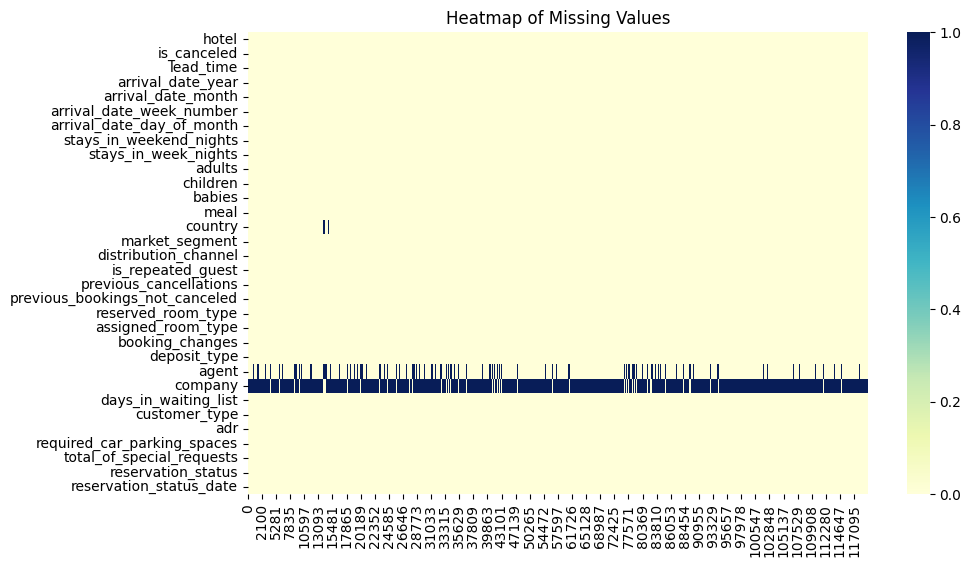

In [78]:
# Create a heatmap for null values
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sns.heatmap(hotel_df.isnull().transpose(), cmap="YlGnBu", cbar=True, yticklabels=True)

# Display the plot
plt.title('Heatmap of Missing Values')
plt.show()


**What did you know about your dataset?**

Answer:
After analysing the dataset and removing the duplicates value, we can say :


*   There are **87396 rows** and **32 columns** .
*   There are **31994 duplicate** rows.
*   There are only **four columns with null/missing value**
     and those columns are **children(4), country(452), agent(12193)** and **company(82137)**.






# **2) Understanding our Variables**



In [82]:
# Describing dataset
# Gives us a statistical overveiw of all the numerical columns present in our dataset
# Includes count,min,max,mean,median,standard deviation
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [83]:
#Finding all the columns of a dataset
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

###Variable Description

**hotel** -> (city hotel or resort hotel)

**is_canceled** -> (if cancelled then 1 else 0)

**lead_time** -> (no of days between booking date and arrival date)

**arrival_year** -> (year part of arrival date)

**arrival_date_month** -> (Month part of arrival date)

**stays_in_weekend_nights** -> (booking made for saturday or sunday)

**stays_in_week_nights** ->(Booking made for rest day of week)

**Adult** -> (no of adults)

**Children** -> (No of children)

**Babies** -> (No of Babies)

**Meal** -> (type of meal booked)

**country** -> (Guest country)

**Distribution_channel** -> (TA= Tour agent and TO=Tour operator)

**is_repeated_guest** -> (if booking from repeated guest then 1 else 0)

**reserved_room_type** -> (type of room reserved during booking)

**assigned_room_type** -> (type of room assinged while checking)

**deposit_type** -> (whether a customer paid for the booking confirmation)

**adr** -> (Average daily revenue)

**total_of_special_requests** -> (No of special request made by the customer)





### Check Unique Values for each variable.

In [84]:
# Find unique values for all columns at a time
unique_values_per_column = hotel_df.apply(pd.Series.unique)
print(unique_values_per_column)

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

#**3) Data Wrangling**

### Data Wrangling Code

In [85]:
#company column have approx 82000 null value out of 89000
#So it would be better to drop this column
#instead of replacing its null value to value

hotel_df.drop(["company"],axis=1,inplace=True)

In [86]:
# replacing all null value of children with 0 assuming that the particular booking have no children
hotel_df["children"].fillna(0,inplace=True)

#replacing all null value of agent with 0 assuming they were not booked by any any agent
hotel_df["agent"].fillna(0,inplace=True)

#replacing all null value of company with unknown assuming the country details were not provided
hotel_df["country"].fillna("Unknown",inplace=True)


In [87]:
# Once again checking for the null value after replacing them with some value
hotel_df.isnull().sum().reset_index(name="No of Null")

,index,No of Null
0,hotel,0
1,is_canceled,0
2,lead_time,0
3,arrival_date_year,0
4,arrival_date_month,0
5,arrival_date_week_number,0
6,arrival_date_day_of_month,0
7,stays_in_weekend_nights,0
8,stays_in_week_nights,0
9,adults,0


In [88]:
#once again checking the shape of dataframe after dropping a column and replacing null values
hotel_df.shape

(87396, 31)

In [89]:
# Creating a copy of hotel_df
# hotel_df1=hotel_df.copy()
# hotel_df1

In [90]:
# ading new column in dataframe that will give the value for total no of members
hotel_df["Total_Members"] =hotel_df["adults"] + hotel_df["children"] + hotel_df["babies"]

In [91]:
#Filtering the rows which do have total_members == 0

filtered_df=hotel_df[hotel_df["Total_Members"]== 0]
filtered_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_Members
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06,0.0
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-10-12,0.0
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23,0.0
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04,0.0
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0,Transient,100.80,0,0,Check-Out,2017-06-30,0.0
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01,0.0
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0,Transient,73.80,0,0,Check-Out,2017-07-17,0.0
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22,0.0


In [92]:
# Removing the filtered data where total_members ==0 from the original dataframe hotel_df

hotel_df=hotel_df[~hotel_df.index.isin(filtered_df.index)]
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_Members
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0


In [93]:
# Creating a copy
# hotel_df2= hotel_df.copy()
# hotel_df2

In [94]:
# Now again checking the unique value in all column after removing duplicated value as well as null values

final_unique_values = hotel_df.apply(pd.Series.unique)
print(final_unique_values)

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 20, 6, 5, 10, 0]
children                                                 [0.0, 1.0, 2.0, 10.0, 3.0]
babies                                                             [0, 1, 2,

### What all manipulations have you done and insights you found?


**Manipulations** :

  *  First of all , we have created a **copy of original dataframe** before doing any
    data manipualtion and wrangling on the dataset.

  * secondly we **dropped** all the duplicate values in our dataset but **kept the
    first value** within duplicates.we have removed a total of **31994 duplicate rows** within our dataset.

  * After handling duplicated value in dataset, we analysed for any kind of   null value. we **replaced** null value in **numerical columns such as children and agent with 0**.The **country** column have string datatype so we **replaced** it with **"unknown"**.
    while we have **dropped**  the **company** column as it have **approx 82000 null values** out of valid 87230 rows.
  *At last added a **new column Total_Members** by adding the columns adult,children and babies in order to prepare dataset for further analysis.




**Insights Derived** :
  
*   Seasonality and Peak Periods
*   Customer Demographics
*   Room Type and Rate Preferences
*   Length of Stay and Booking Window
*   Meal preferences
*   Customer Loyalty,Retention
*   Lead time and cancellation policies
*   Customer satisfaction to special request  
*   Rate Parity and Competitor Analysis
*   Revenue Management Strategies
*   Market Trends and Opportunities
*   ways to enahnce Adr


#**4) Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables following **UBM Rule****

###**univariate analysis**

#### Chart - 1 : Hotel type





**Which hotel type is most appealing to guests?**

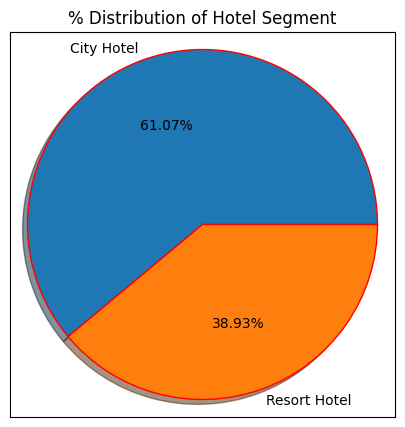

In [95]:
#most preferred hotel type by guests

#Count the frequency of each category in hotel column
hotel_count= hotel_df["hotel"].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5,5))
plt.pie(hotel_count, labels=hotel_count.index, autopct='%2.2f%%', startangle=0,shadow=True,
         labeldistance=1.07,frame=True,normalize=True,wedgeprops={'edgecolor': 'Red'} )

# Remove axis ticks
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

# Add a title
plt.title('% Distribution of Hotel Segment')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Pie charts are ideal for showing how different categories contribute to a total percentage and thus helps us to visualise the **relative size of each category**.

##### 2. What is/are the insight(s) found from the chart?

On analysing the pie chart, we get to know the **city hotel type is the most sought choice** for customers **over the resort hotel type**.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

yes definately, this insight can **help associates to know which hotel type is most popular within cutomers** and hence they can **allocates more resources** to it accordingly. No such negative growth can be derived from this insight but the associates can focus more on city hotels.

#### Chart - 2 : Hotel Booking cancellation

**What is the distribution for hotel booking cancellation?**

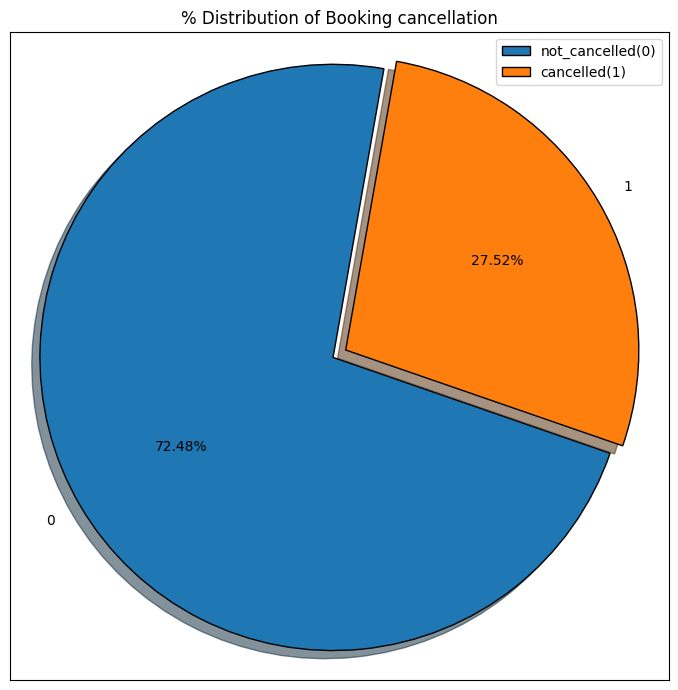

In [96]:
#Hotel Booking Cancellation

#Count the frequency of cancelltion category in is_canceled column
cancelled_count= hotel_df["is_canceled"].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8.5,8.5))
plt.pie(cancelled_count, labels=cancelled_count.index, autopct='%2.2f%%', startangle=80,shadow=True,
         frame=True,normalize=True,wedgeprops={'edgecolor': 'black'} ,explode=[0.05, 0])

# Remove axis ticks
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

# Add a title
plt.title('% Distribution of Booking cancellation')

# Adding the legend
labels=["not_cancelled(0)" ,"cancelled(1)"]
plt.legend( labels, loc="upper right",bbox_to_anchor=(0.6, 0.09, 0.4, 0.91),frameon=True)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

We choose pie chart beacuse they are **ideal for visualising categorial data** showing how different categories contribute to a whole either in terms of percntage or proportion.

##### 2. What is/are the insight(s) found from the chart?

So, from pie chart it is clear that a **large portion of booking is still intact** and approx **28% booking got cancelled**.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Analyzing cancellation percentage of hotel bookings do provide a valuable insights to hotel industry and the associated revnue managers.It can help in **identification of the specific events** which ultimately acompany large **cancellation rates**. This can help hotels to rectify and **plan** their pricing, inventory,marketing strategies and **flexible cancellation policies** accordingly.

#### Chart - 3 :Guest Demographic Variation

**Which country Guest made the maximum booking?**


In [97]:
# Guest Demographic information
# using groupby and sorting the values

country_df=hotel_df.groupby("country").size().sort_values(ascending=False).reset_index(name="No of Guests").head(15)
country_df

,country,No of Guests
0,PRT,27355
1,GBR,10424
2,FRA,8823
3,ESP,7244
4,DEU,5385
5,ITA,3061
6,IRL,3015
7,BEL,2081
8,BRA,1993
9,NLD,1910


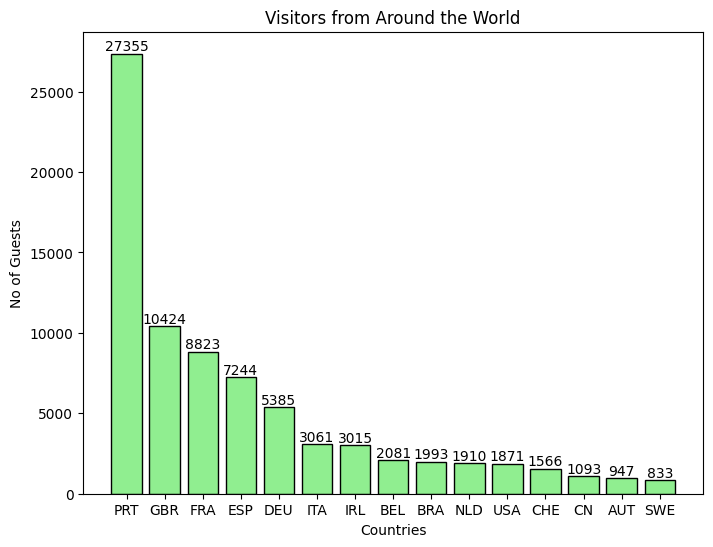

In [98]:
# Visulizing the above values

# setting up the figure dimension
plt.figure(figsize=(8, 6))
plt.bar(country_df["country"], country_df["No of Guests"], color='lightgreen', edgecolor='black')

# Adding titles and labels
bars=plt.title('Visitors from Around the World')
plt.xlabel('Countries')
plt.ylabel('No of Guests')

# Adding corresponding values to the top of bar
[plt.text(i , value + 5, str(value), ha='center', va='bottom') for i, value in enumerate(country_df["No of Guests"])]

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

we choose **bar graph** for this purpose because it is easy to **compare different categories** in bar graph side by side when each of the category are discrete.Here, we are comparing various countries along with the number of guests that came from that particular country.

##### 2. What is/are the insight(s) found from the chart?

It is evident from the bar graph that the **visitors from the PRT(Portugal)** have carried out the **maximun bookings**.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

 There is no such negative aspects. However the associates can **cater portuguese culture, traditions to greet them** which **raise positive word of mouth** .They can also **include popular portuguese cuisines** in their menu .the associates can also **collabrate with various portuguese travel agencies** to enhance their revenue.This will boost up the visitors experience and overall satisfaction.

#### Chart - 4 :Guest Cuisine preferences

**Which is the most preffered Cuisine Choice?**

In [99]:
# creating a new dataframe meal_df
meal_df=hotel_df.groupby("meal").size().sort_values(ascending=False).reset_index(name="No of Guests").head(15)
meal_df

,meal,No of Guests
0,BB,67907
1,SC,9391
2,HB,9080
3,Undefined,492
4,FB,360


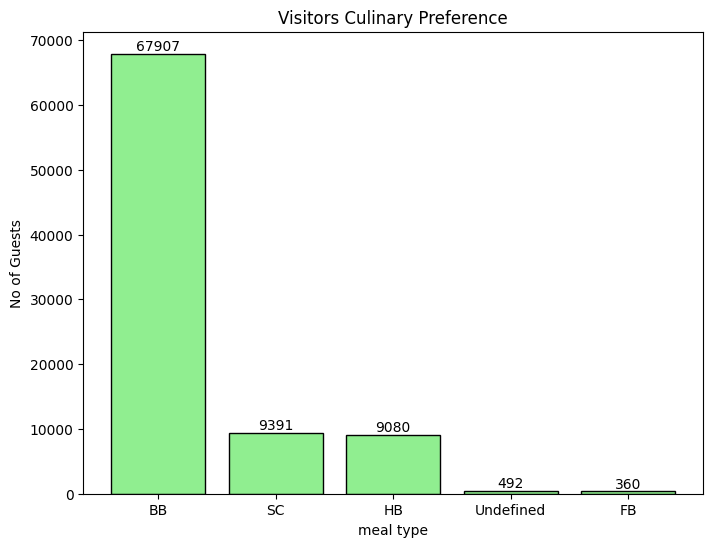

In [100]:
# Visulizing the above values

# setting up the figure dimension
plt.figure(figsize=(8,6))

# Plotting the bar chart with a color palette
plt.bar(meal_df["meal"], meal_df["No of Guests"], color="lightgreen", edgecolor='black')

# Adding titles and labels
bars=plt.title('Visitors Culinary Preference')
plt.xlabel('meal type')
plt.ylabel('No of Guests')

# Adding corresponding values to the top of bar
[plt.text(i , value + 5, str(value), ha='center', va='bottom') for i, value in enumerate(meal_df["No of Guests"])]

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

we choose bar graph for this purpose because it is easy to compare different categories of discrete nature.Here, unique meal types are compared side by side.

##### 2. What is/are the insight(s) found from the chart?

**Meal type description**:

**BB**-> Bed & Breakfast

**SC**-> self-catering

**HB**-> Half Board

**FB**-> Full Board

So, from the graph it is quite evident that **Bed & Breakfast (BB) is most soughted meal preference** for the guest while the **Full Board(FB) is the least preferred one**.



##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

There is no such negative insights. However the associates can **extend quality and quantitative breakfast** to customers which can lead to **repetative business** and **word-of-mouth referrals**.

#### Chart - 5 :Most preferred booking month

**Which month got the maximun number of bookings?**

In [101]:
##finding the month and their crosseponding booking count
month_df=hotel_df["arrival_date_month"].value_counts().reset_index(name="No of Bookings")

##Convert 'Month' to a categorical type with an ordered category
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

#Sorting the month from jan to december
month_df['arrival_date_month'] = pd.Categorical(month_df['arrival_date_month'], categories=month_order, ordered=True)

#show the sorted dataframe
month_df.sort_values("arrival_date_month")


,arrival_date_month,No of Bookings
11,January,4685
8,February,6083
5,March,7489
3,April,7900
2,May,8344
4,June,7756
1,July,10043
0,August,11242
7,September,6682
6,October,6921


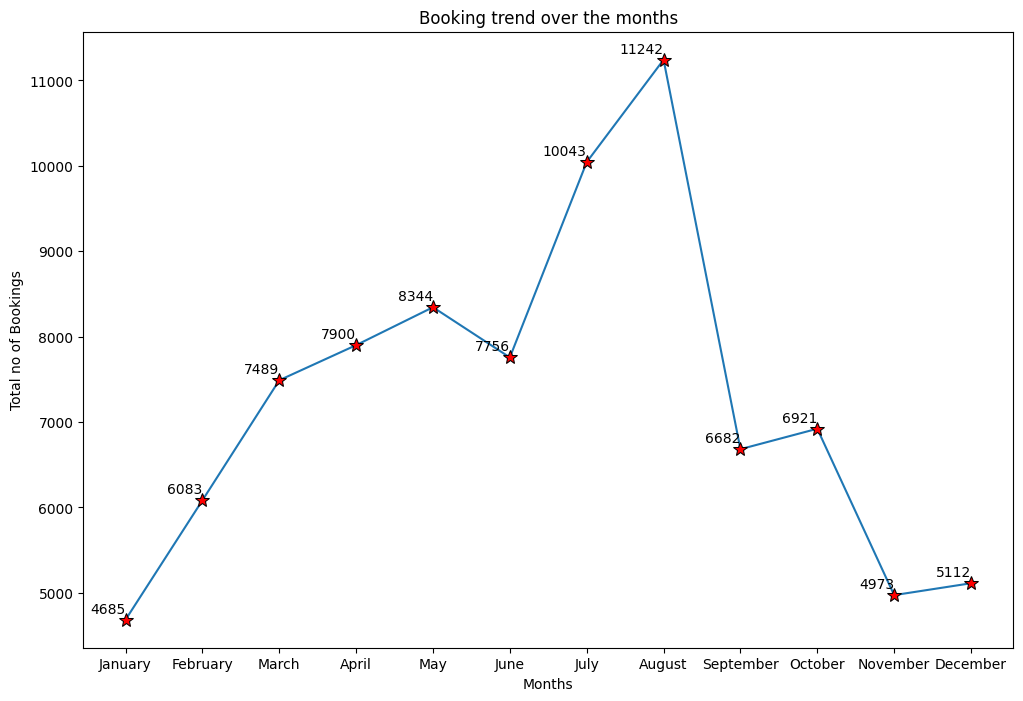

In [102]:
# using visulisation tool

# setting up the figure dimension
plt.figure(figsize=(12,8))

#using seaborn library to plot line graph
sns.lineplot(data= month_df , x = month_df["arrival_date_month"] , y = month_df["No of Bookings"] ,
                  marker= "*" , markerfacecolor='red',  markeredgecolor='black', markersize=10)

# Adding values to the line plot
for x, y in zip(month_df['arrival_date_month'], month_df['No of Bookings']):
    plt.text(x, y+80, f'{y}', ha='right', va='baseline')

# Adding titles and labels
plt.title('Booking trend over the months')
plt.xlabel('Months')
plt.ylabel('Total no of Bookings')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

we have used **line chart** over here beacuse the line chart is ideal to represent the **trend of continuous data over a period of time**.Here , we have shown the booking trend that varies across the month.

##### 2. What is/are the insight(s) found from the chart?



* The graph reveals that **August** have the **maximum booking followed by July** while the **least booking** came for **January** month.
* The **booking trend tend to increase from january onwards** and **peaks in august** and **after that there is negative trend till december**.  




##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.



There is no such negative insights, but the hotel industry can **prepare themselves** in advance in a best possible way for the month of **july and august to cater any need of customers**. Apar from this , the associated can run various **promotional offers to boost the booking for January** month as it has least booking count.



#### Chart - 6 :Most preferred Room type

**Which room type got the maximun number of bookings?**

In [103]:
room_df=hotel_df.groupby(["reserved_room_type"]).size().reset_index(name="No of Bookings").sort_values(by="No of Bookings",ascending= False)
room_df

,reserved_room_type,No of Bookings
0,A,56436
3,D,17376
4,E,6036
5,F,2820
6,G,2050
1,B,996
2,C,914
7,H,596
8,L,6


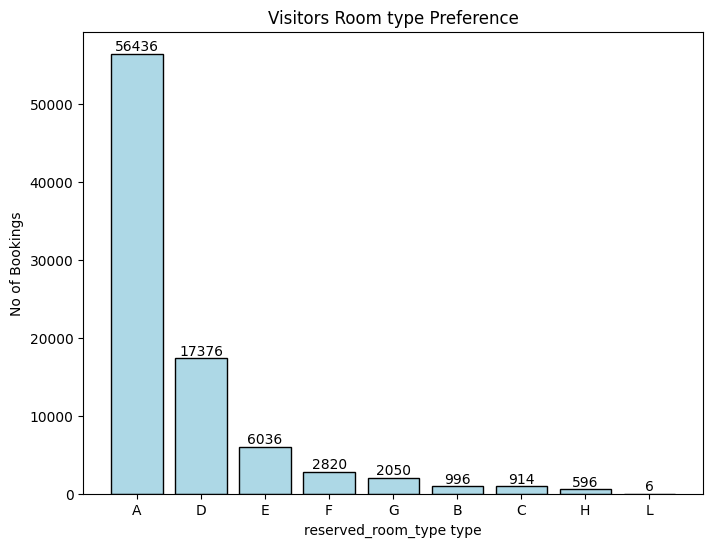

In [104]:
# Visulizing the above values

# setting up the figure dimension
plt.figure(figsize=(8,6))

# Plotting the bar chart with a color palette
plt.bar(room_df["reserved_room_type"], room_df["No of Bookings"], color="lightblue", edgecolor='black')

# Adding titles and labels
bars=plt.title('Visitors Room type Preference')
plt.xlabel('reserved_room_type type')
plt.ylabel('No of Bookings')

# Adding corresponding values to the top of bar
[plt.text(i , value + 5, str(value), ha='center', va='bottom') for i, value in enumerate(room_df["No of Bookings"])]

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

We have choosed **bar graph** to represent the variation in room type preference because bar graph is ideal for **comparing categorial data side by side**.

##### 2. What is/are the insight(s) found from the chart?

We found that **room type A** is the **most preferred** choice of the customer **followed by room type D** while the **room type L** is the **least preferred one**.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

The booking associates should play strategically for **room type A & D** from the price point of veiw. They should **focus more on these two room types and deploy resources** accordingly.

#### Chart - 7 :Customer type

**Which customer type got the maximun number of bookings?**

In [105]:
##finding the customer type and their crosseponding booking count
customer_df=hotel_df["customer_type"].value_counts().reset_index(name="No of Bookings")
customer_df

,customer_type,No of Bookings
0,Transient,71862
1,Transient-Party,11692
2,Contract,3135
3,Group,541


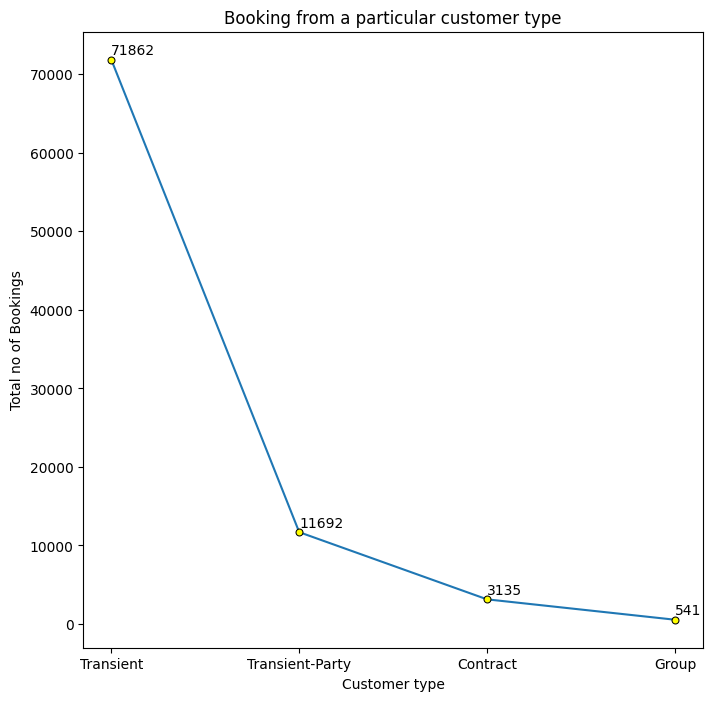

In [106]:
# using visulisation tool

# setting up the figure dimension
plt.figure(figsize=(8,8))

#using seaborn library to plot line graph
sns.lineplot(data= customer_df , x = customer_df["customer_type"] , y = customer_df["No of Bookings"] ,
                  marker= "o" , markerfacecolor='yellow',  markeredgecolor='black', markersize=5)

# Adding values to the line plot
for x, y in zip(customer_df['customer_type'], customer_df['No of Bookings']):
    plt.text(x, y+250, f'{y}', ha='left', va="bottom")

# Adding titles and labels
plt.title('Booking from a particular customer type')
plt.xlabel('Customer type')
plt.ylabel('Total no of Bookings')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

We choose line graph beacuse it will show us the **booking trend by different group of customers**

##### 2. What is/are the insight(s) found from the chart?

we found that **Transient type customers** have made **maximum bookings** while the **Group type have made least bookings**.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

The associates should have a feedback from group type customer on area of improvement and should also carry out a numerous promotional offers and discounts in order to lure group type customers.

#### Chart - 8 :Guest repetation frequency

**What is the frequency for guest repetation?**

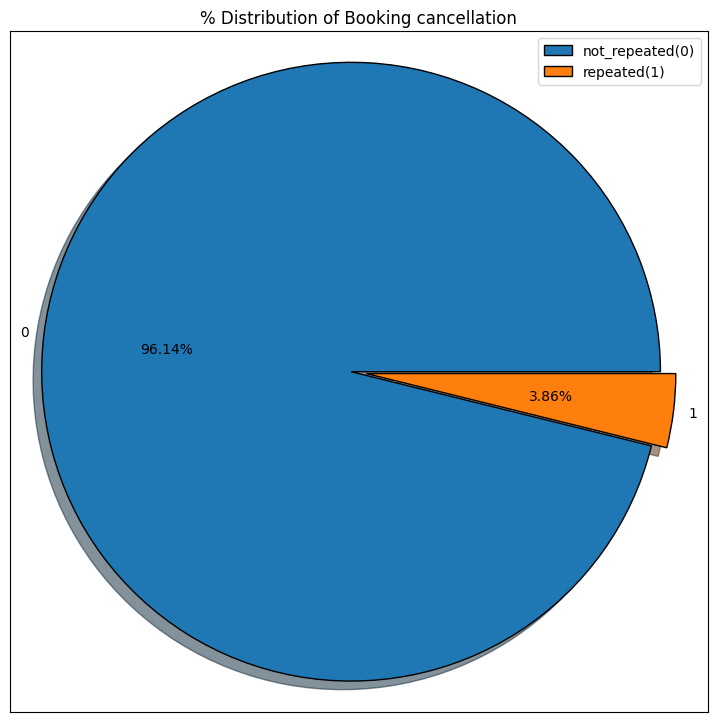

In [107]:
#Hotel Booking repetation frequency

#Count the frequency of repetation
frequency_count= hotel_df["is_repeated_guest"].value_counts()

# Plotting the pie chart
plt.figure(figsize=(9,9))
plt.pie(frequency_count, labels=frequency_count.index, autopct='%2.2f%%', startangle=0,shadow=True,
         frame=True,normalize=True,wedgeprops={'edgecolor': 'black'} ,explode=[0.05, 0],labeldistance=1.05)

# Remove axis ticks
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

# Add a title
plt.title('% Distribution of Booking cancellation')

# Adding the legend
labels=["not_repeated(0)" ,"repeated(1)"]
plt.legend( labels, loc="upper right",bbox_to_anchor=(0.6, 0.09, 0.4, 0.91),frameon=True)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

We chhose pie chart as it shows the **relative proportion of a sliced part** with respect to whole.

##### 2. What is/are the insight(s) found from the chart?

We found that only **3.86% of customers are the repetative guest** and majority of guests seems to be new one.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

There is **negative concern** with this insight.A Vast majority of customers approx **96.14% are new one** and only 3.86% of customers are repetative.This shows a **negative growth rate for repetative customer**.

#### Chart - 9 : Preferred Deposit type



**what is the most preferred deposit medium?**

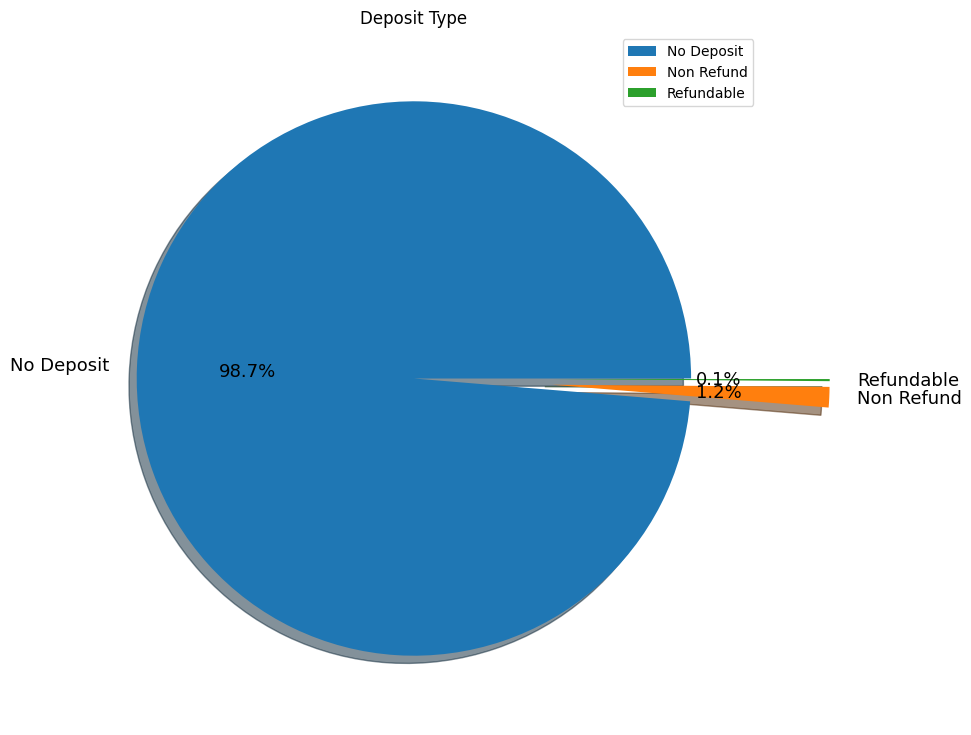

In [108]:
# Chart - 13 visualization code
#find out percentage using pie chart
plt.figure(figsize=(9,9))
plt.pie(hotel_df.deposit_type.value_counts(),explode=[0,0.5,0.5],labels=['No Deposit','Non Refund','Refundable']
        ,autopct="%0.1f%%",shadow=True,textprops={'fontsize':13})
plt.legend(bbox_to_anchor=(1,1))
plt.title('Deposit Type')
plt.show()

#####1. Why did you pick the specific chart?

We choose pie chart to represent the deposit medium as it will show us the proportion of each part individually.

##### 2. What is/are the insight(s) found from the chart?

It is found that most of customer(98.7%) prefer to choose No deposit type

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

The **No Deposit type is a powerful tool in the hotel industry**.However, it also comes with **potential challenges** like **higher cancellation rates** and **delayed cash flow**. Hotels need to carefully consider these factors when deciding whether to offer a No Deposit option and how to integrate it into their overall revenue management strategy.

###**Bivariate analysis**


#### Chart - 10 : Cancellation frequency over month



**How does the cancellation frequency varies across month?**




In [109]:

# Creating a new dataframe to analyse cancellation frequency across varoius month
cancel_frequency_df = hotel_df.groupby("arrival_date_month",observed=True)["is_canceled"].value_counts().rename('No of cancellations')
cancel_frequency_df


arrival_date_month  is_canceled
April               0              5494
                    1              2406
August              0              7620
                    1              3622
December            0              3735
                    1              1377
February            0              4671
                    1              1412
January             0              3648
                    1              1037
July                0              6847
                    1              3196
June                0              5403
                    1              2353
March               0              5660
                    1              1829
May                 0              5902
                    1              2442
November            0              3921
                    1              1052
October             0              5279
                    1              1642
September           0              5041
                    1              1641
Name: No of cancellations, dtype: int64

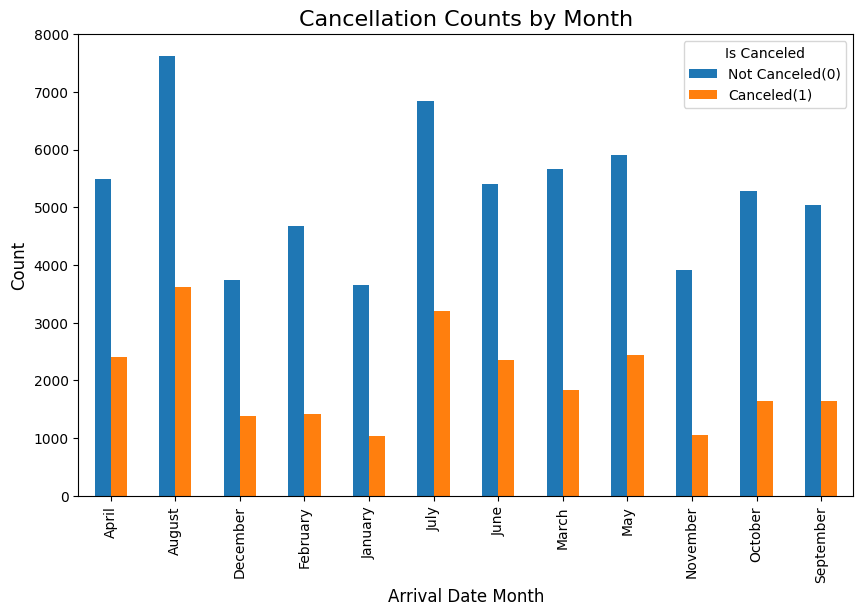

In [120]:
#Visulising the cancellation frequency across months

# Define the correct order for the months
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# Convert 'arrival_date_month' to a categorical type with the correct order using .loc
hotel_df.loc[:, 'arrival_date_month'] = pd.Categorical(hotel_df['arrival_date_month'],
                                                       categories=month_order,
                                                       ordered=True)

# Group by with observed=True to silence the FutureWarning
counts = hotel_df.groupby(["arrival_date_month", "is_canceled"], observed=True).size().unstack()

# Plot the counts
counts.plot(kind='bar', figsize=(10, 6))

# using xticks to order month on graph
#plt.xticks(range(len(month_order)), month_order)

# adding the title and legends
plt.title("Cancellation Counts by Month", fontsize=16)
plt.xlabel("Arrival Date Month", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Is Canceled", labels=['Not Canceled(0)', 'Canceled(1)'])

#show the plot
plt.show()



1. Why did you pick the specific chart?

we have used **count plot** beacuse counts.plot() seems to be a **ideal choice** when we want want to **visualize the frequency of occurrences (counts) of data in a pandas Series or after performing some kind of aggregation** in a DataFrame.

##### 2. What is/are the insight(s) found from the chart?

The insight that can be drawn is that the **August** month have the **highest cancellation** frequency while the **january** month have the **minimum cancellation** frequency.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

The associates can run various promotional promotional offers and **flexible rescheduling policies** in order to **prevent cancellations**.

#### Chart - 11 : Total stay Duration

**How long does guest stay in different hotel category?**

In [111]:
# creating a new dataframe by adding two rows

hotel_df.loc[:, 'Total_Duration']= hotel_df["stays_in_weekend_nights"] +hotel_df["stays_in_weekend_nights"]

#now , filtering the dataframe for our analysis
filter_stay_df = hotel_df[(hotel_df["is_canceled"] == 0) &(hotel_df["Total_Duration"]>0) &(hotel_df["Total_Duration"]<12) ]
filter_stay_df.head()

<ipython-input-111-686792803bf4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df.loc[:, 'Total_Duration']= hotel_df["stays_in_weekend_nights"] +hotel_df["stays_in_weekend_nights"]


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_Members,Total_Duration
20,Resort Hotel,0,37,2015,July,27,1,1,4,1,0.0,0,BB,GBR,Online TA,TA/TO,...,0,0,F,F,0,No Deposit,241.0,0,Transient,97.29,0,1,Check-Out,2015-07-06,1.0,2
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,A,A,1,No Deposit,250.0,0,Transient,84.67,0,1,Check-Out,2015-07-07,2.0,4
23,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,...,0,0,D,D,1,No Deposit,250.0,0,Transient,99.67,0,1,Check-Out,2015-07-07,2.0,4
24,Resort Hotel,0,127,2015,July,27,1,2,5,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,...,0,0,D,I,0,No Deposit,115.0,0,Contract,94.95,0,1,Check-Out,2015-07-01,2.0,4
25,Resort Hotel,0,78,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,...,0,0,D,D,0,No Deposit,5.0,0,Transient,63.60,1,0,Check-Out,2015-07-08,2.0,4


In [112]:
#hotel_df.drop('Total_Durtion', axis=1, inplace=True)


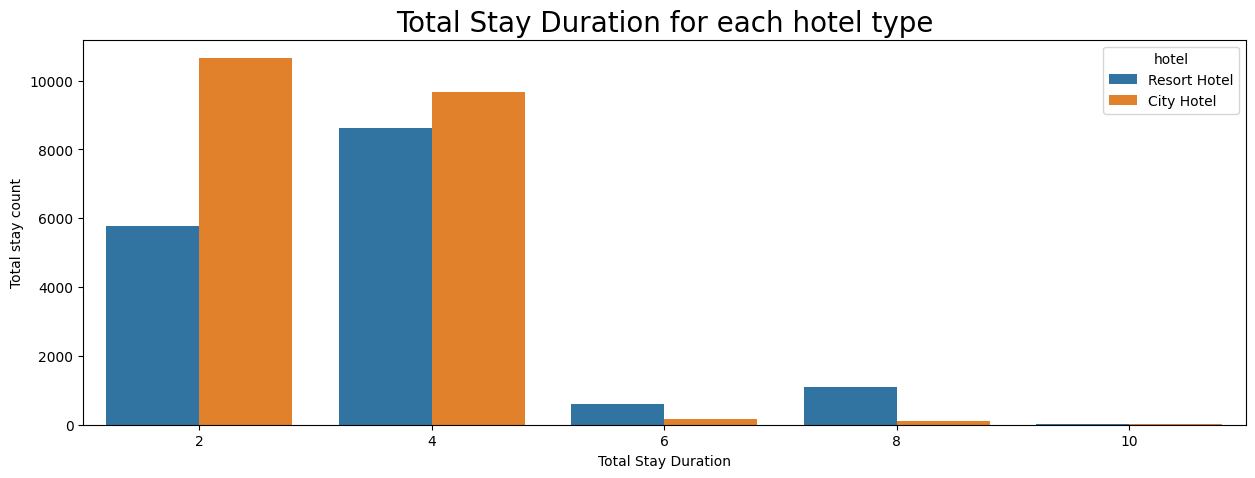

In [113]:
#setting the plotsize and countplt
plt.figure(figsize =(15,5))
sns.countplot(x= filter_stay_df["Total_Duration"],hue = filter_stay_df["hotel"])

#adding labels and legend to the chart
plt.title("Total Stay Duration for each hotel type",fontsize=20)
plt.xlabel("Total Stay Duration")
plt.ylabel("Total stay count")

#Show the graph
plt.show()

1. Why did you pick the specific chart?

we choosed countplot because it **automatically groups** the data by the **categorical variable (hotel type)**, making it easy to **compare the count** of stays across different hotel types.

##### 2. What is/are the insight(s) found from the chart?

The insight derived is that the most **preferred stay duration** for **city hotel is around 2 days** while for the **resort it is around 4 days**.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Resort hotel are most preferred for long holidays and hence average stay duration is almost double than the city hotel. The associated can allocate resources for loyalty benefit programs, extra aminities ,personalised services, flexible biling policies to earn a positive word-of-mouth for future revenues.

#### Chart - 12 : Adr variation across month

**How  does the adr varies across months for different hotel category?**

In [114]:
#Creating a new dataframe for analysis

resort_df = hotel_df[(hotel_df["hotel"]=="Resort Hotel") & (hotel_df["is_canceled"]==0)].groupby("arrival_date_month",observed=True)["adr"].mean().reset_index(name="Adr_resort")
resort_df


,arrival_date_month,Adr_resort
0,April,76.841664
1,August,182.103524
2,December,64.072826
3,February,53.624311
4,January,48.599615
5,July,150.914540
6,June,109.026942
7,March,57.110018
8,May,77.725129
9,November,48.956548


In [115]:
city_df = hotel_df[(hotel_df["hotel"]=="City Hotel") & (hotel_df["is_canceled"]==0)].groupby("arrival_date_month",observed=True)["adr"].mean().reset_index(name="Adr_city")
city_df

,arrival_date_month,Adr_city
0,April,114.251636
1,August,122.825388
2,December,90.769559
3,February,88.210810
4,January,83.378062
5,July,120.069489
6,June,120.673753
7,March,91.306933
8,May,124.825944
9,November,88.271089


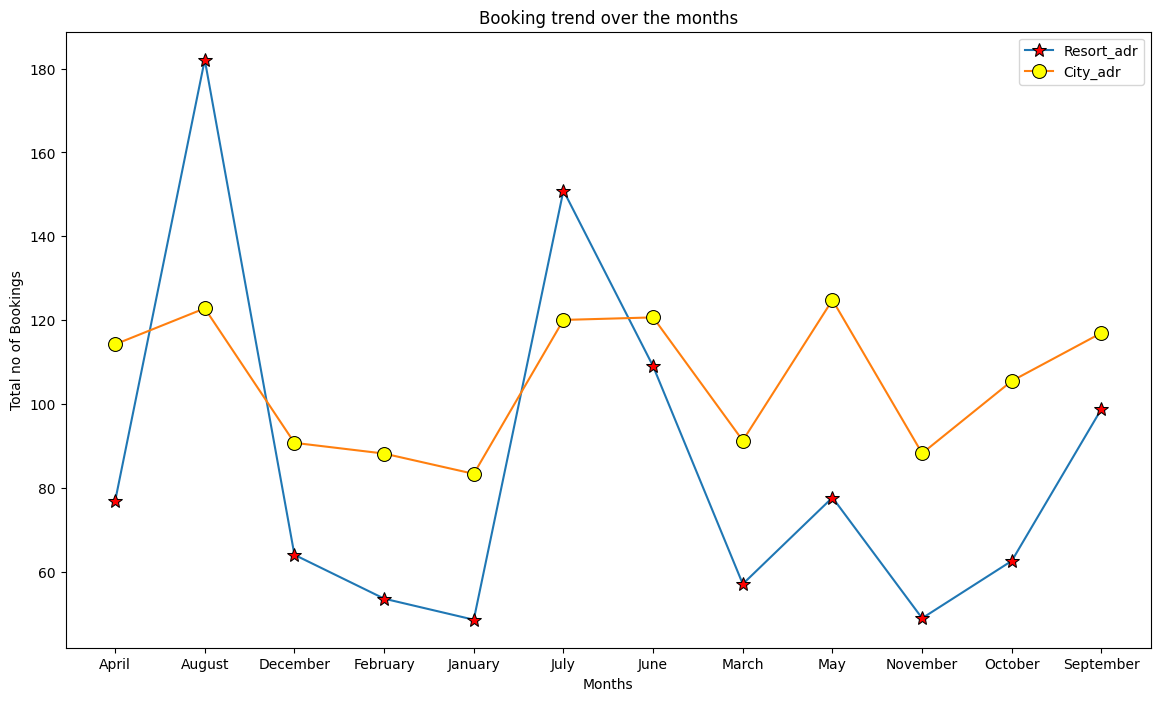

In [116]:
# using visulisation tool

# setting up the figure dimension
plt.figure(figsize=(14,8))
plt.grid(False)

#using seaborn library to plot line graph for resort_adr
sns.lineplot(data= resort_df , x = resort_df["arrival_date_month"] , y = resort_df["Adr_resort"] ,
                  marker= "*" , markerfacecolor='red',  markeredgecolor='black', markersize=10,label="Resort_adr")

#using seaborn library to plot line graph for city_adr
sns.lineplot(data= city_df , x = city_df["arrival_date_month"] , y = city_df["Adr_city"] ,
                  marker= "o" , markerfacecolor='yellow',  markeredgecolor='black', markersize=10,label="City_adr")

# Adding titles,legends and labels
plt.title('Booking trend over the months')
plt.xlabel('Months')
plt.ylabel('Total no of Bookings')
plt.legend()

# Show the plot
plt.show()

#####1. Why did you pick the specific chart?

We choose **line graph** beacuse the line graphs best suited to **represent the trend over time** for continuos data.

##### 2. What is/are the insight(s) found from the chart?

The insight drawn from this analysis is that the **average adr for the city hotel shows less variation** compared to that of resort type. The **average resort adr shows a positive trend from febuary onwards and peaks in august** .

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

The associated can **focus on increasing the average adr for city hotel as it is almost flat** throughout the year.

#### Chart - 13 : Booking Channel

**How does the booking channel preference varies across different hotel category?**

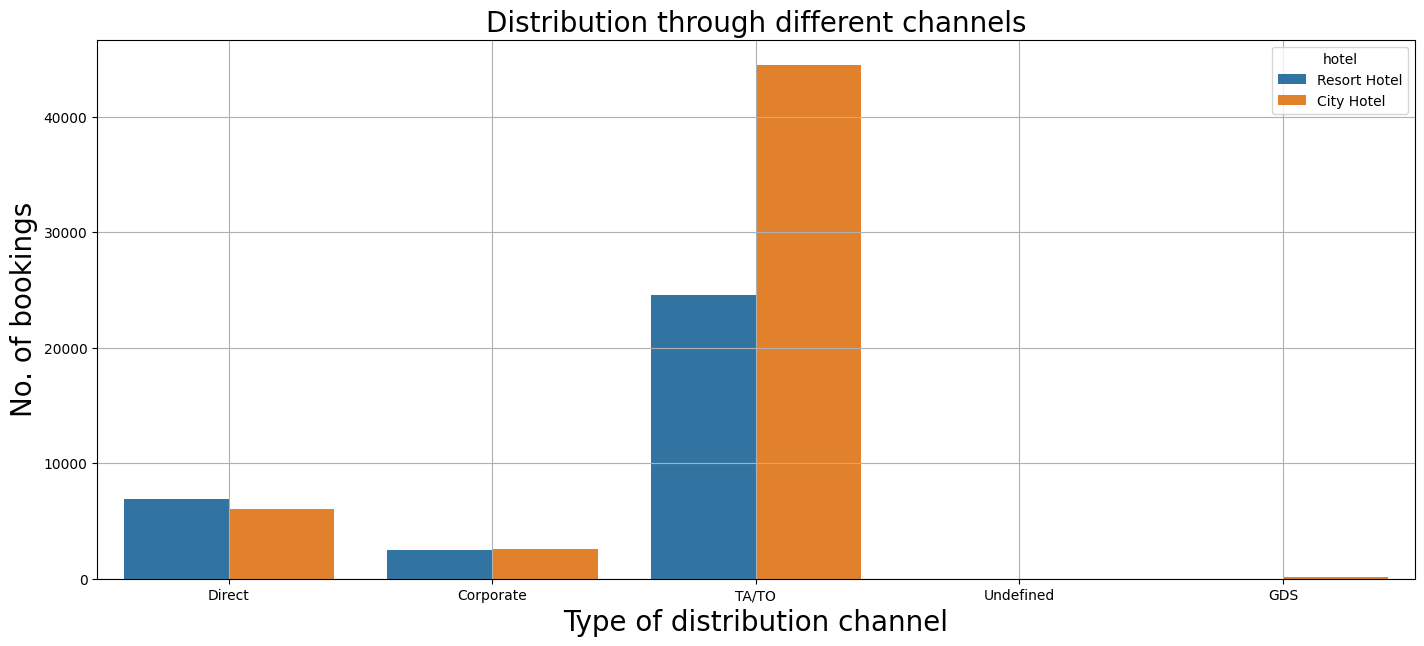

In [117]:
# Chart - 9 visualization code
# To know most preferred distribution channel for booking

#setting up the figure size
plt.figure(figsize=(17,7))

#plotting the countplot
sns.countplot(x='distribution_channel',data=hotel_df,hue=hotel_df["hotel"])

#adding title and legends
plt.title('Distribution through different channels',fontsize=20)
plt.xlabel('Type of distribution channel',fontsize=20)
plt.ylabel('No. of bookings',fontsize=20)
plt.grid(True)

#show the plot
plt.show()

#####1. Why did you pick the specific chart?

we choose count plot because it creates a bar plots representing the counts of observations in each category of a hotel type. It is particularly useful when we want to visualize the distribution of a categorical variable, showing how many times each category appears in your data.

##### 2. What is/are the insight(s) found from the chart?

It is found that **most of booking in resort as well as city hotel came from Travel agent/tour operator** followed by direct booking in both categories.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

The associates **can offer discount on direct booking as they do not have to pay commission to TA/TO** which -*can help maintaing a direct relationship with the customer who choose direct medium to book hotels.

###**Multivariate analysis**

####Chart - 14 : Corelation between Numerical variables using Heatmap


**How does all the numericals variable are related to each other?**

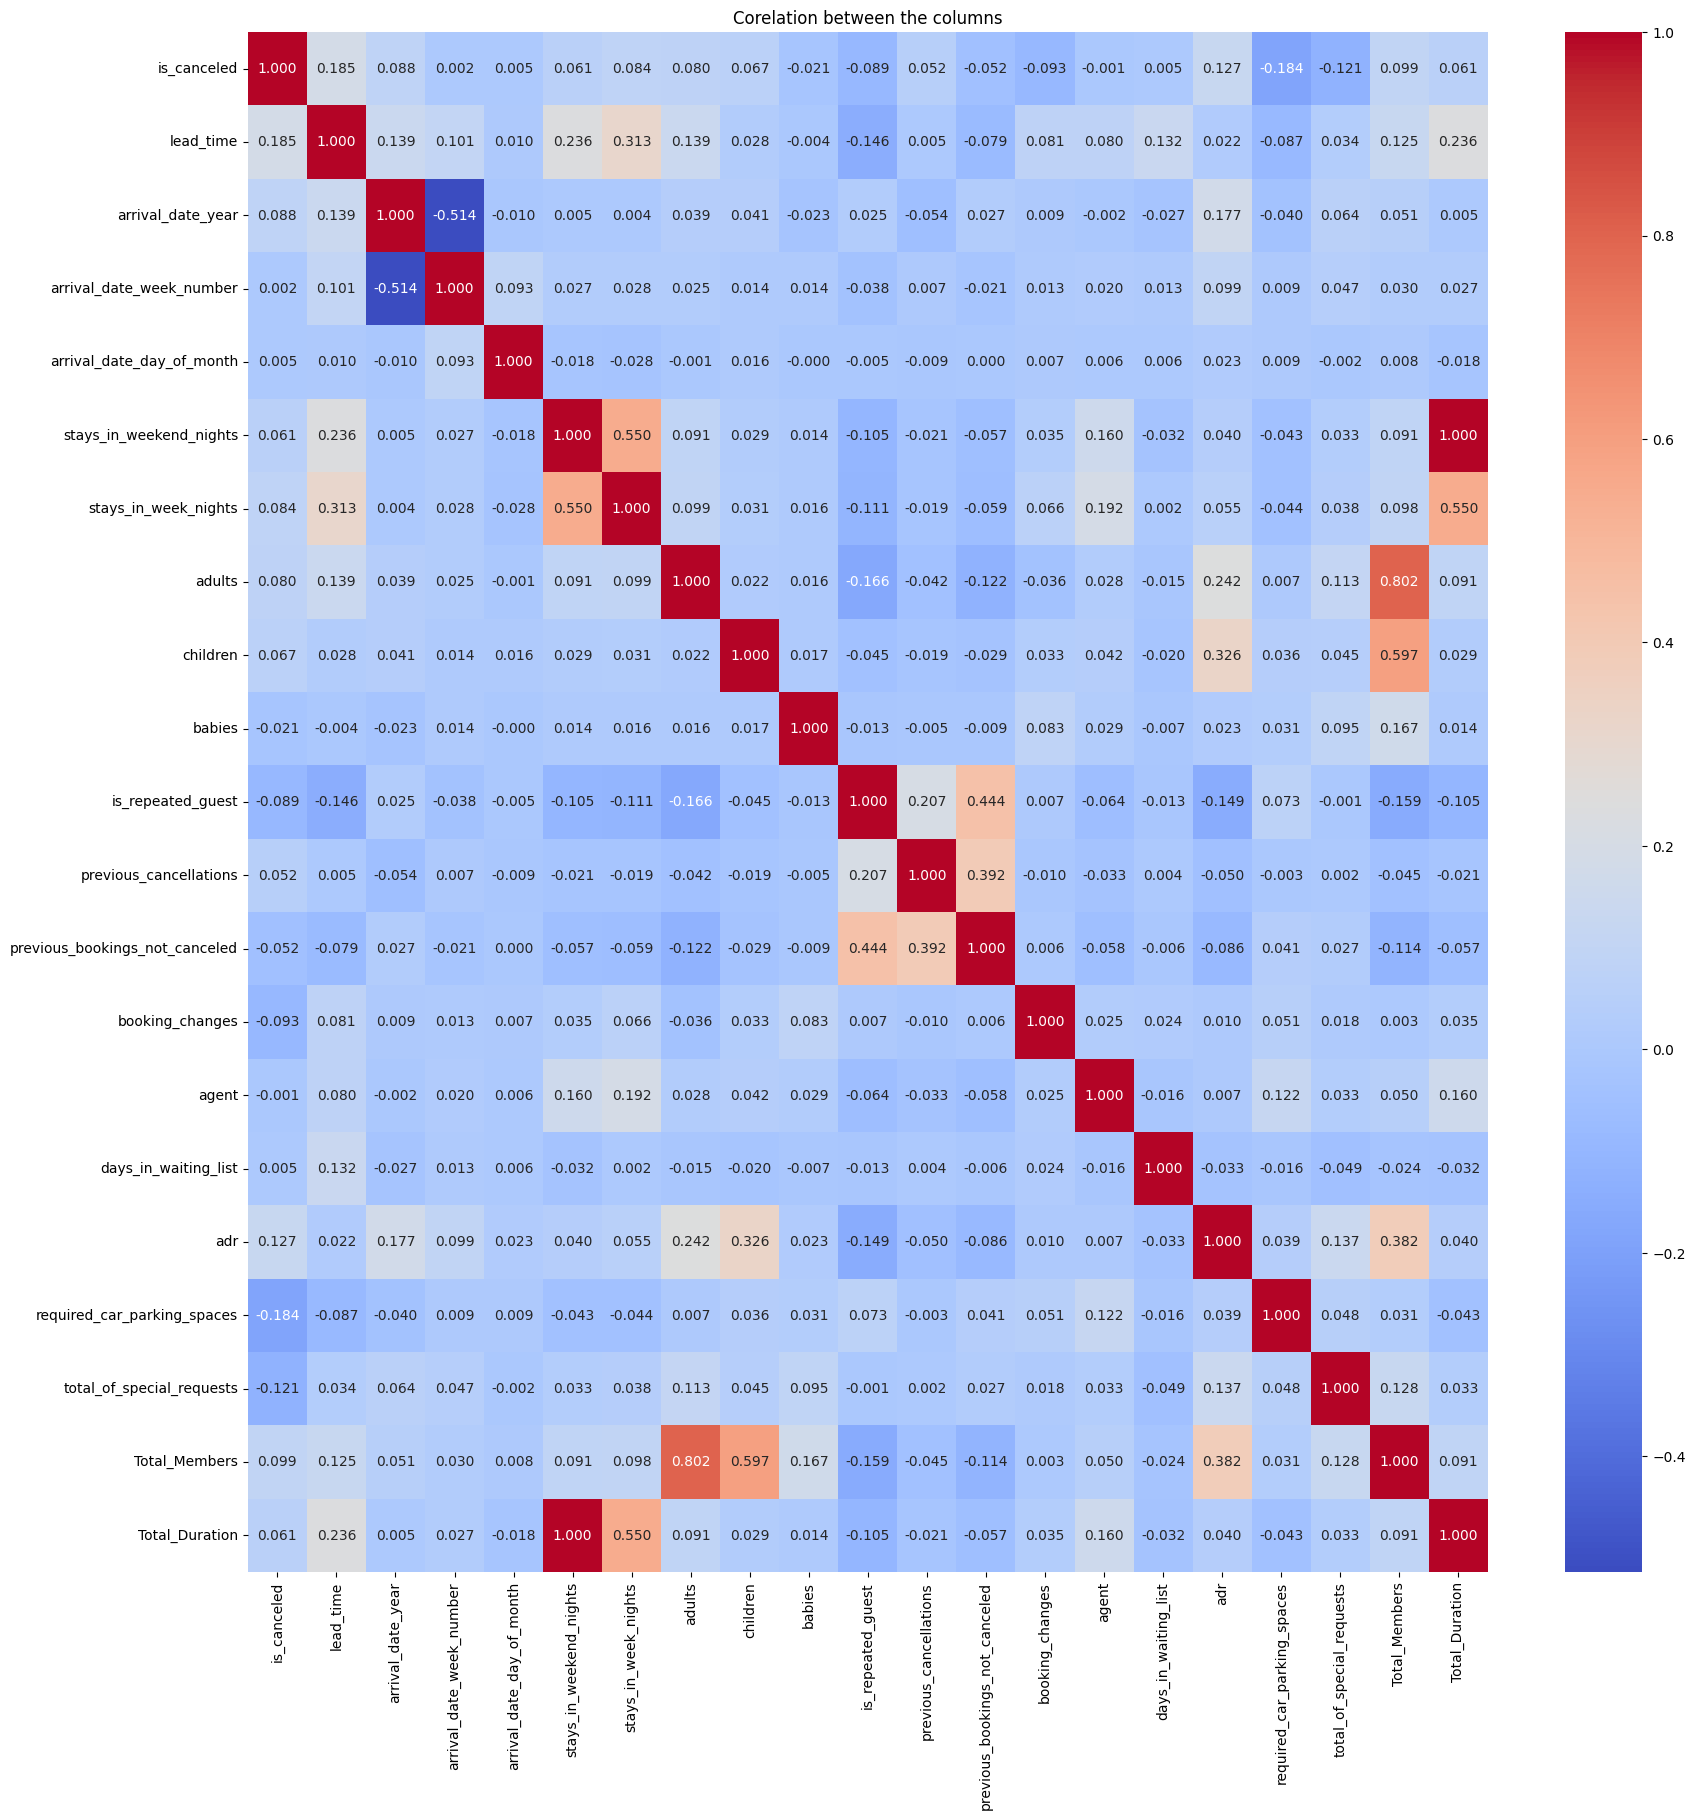

In [118]:
# Heatmap to determine corelations between variables

#Setting the figure
plt.figure(figsize=(20,20))

#creating Heatmap to analyse reltion between variables
sns.heatmap(hotel_df.corr(numeric_only=True),annot=True,fmt='.3f',cmap="coolwarm")

#Setting the title
plt.title("Corelation between the columns")

#Show the heatmap
plt.show()

#####1. Why did you pick the specific chart?

we choose heatmap because heatmap can show the **relationship between all the numerical variables simultaneously**, thus making it easier for multivariate analysis.Heatmap shows the **relative strength between the variables**.

##### 2. What is/are the insight(s) found from the chart?

**Insight drawn are:**
*   Relationship between **adr and repeated guest is negative**.This shows a **strong negative trend on adr for repeated guest**.
*   **Strong corelation between repeated guest and previous booking not cancelled**.This means most of the repeated guest do not cancel their bookings.


*   **Negative corelation between cancellation and car parking space**


*   **Adr for children is greater than those of adults**.
*   **Adult constitute a majority portion of total members**.




##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes there is negative growth rate on adr for repeated guest. The associates should run various promotional policies to lure repetative guest.

####Chart - 15 : Pair Plot

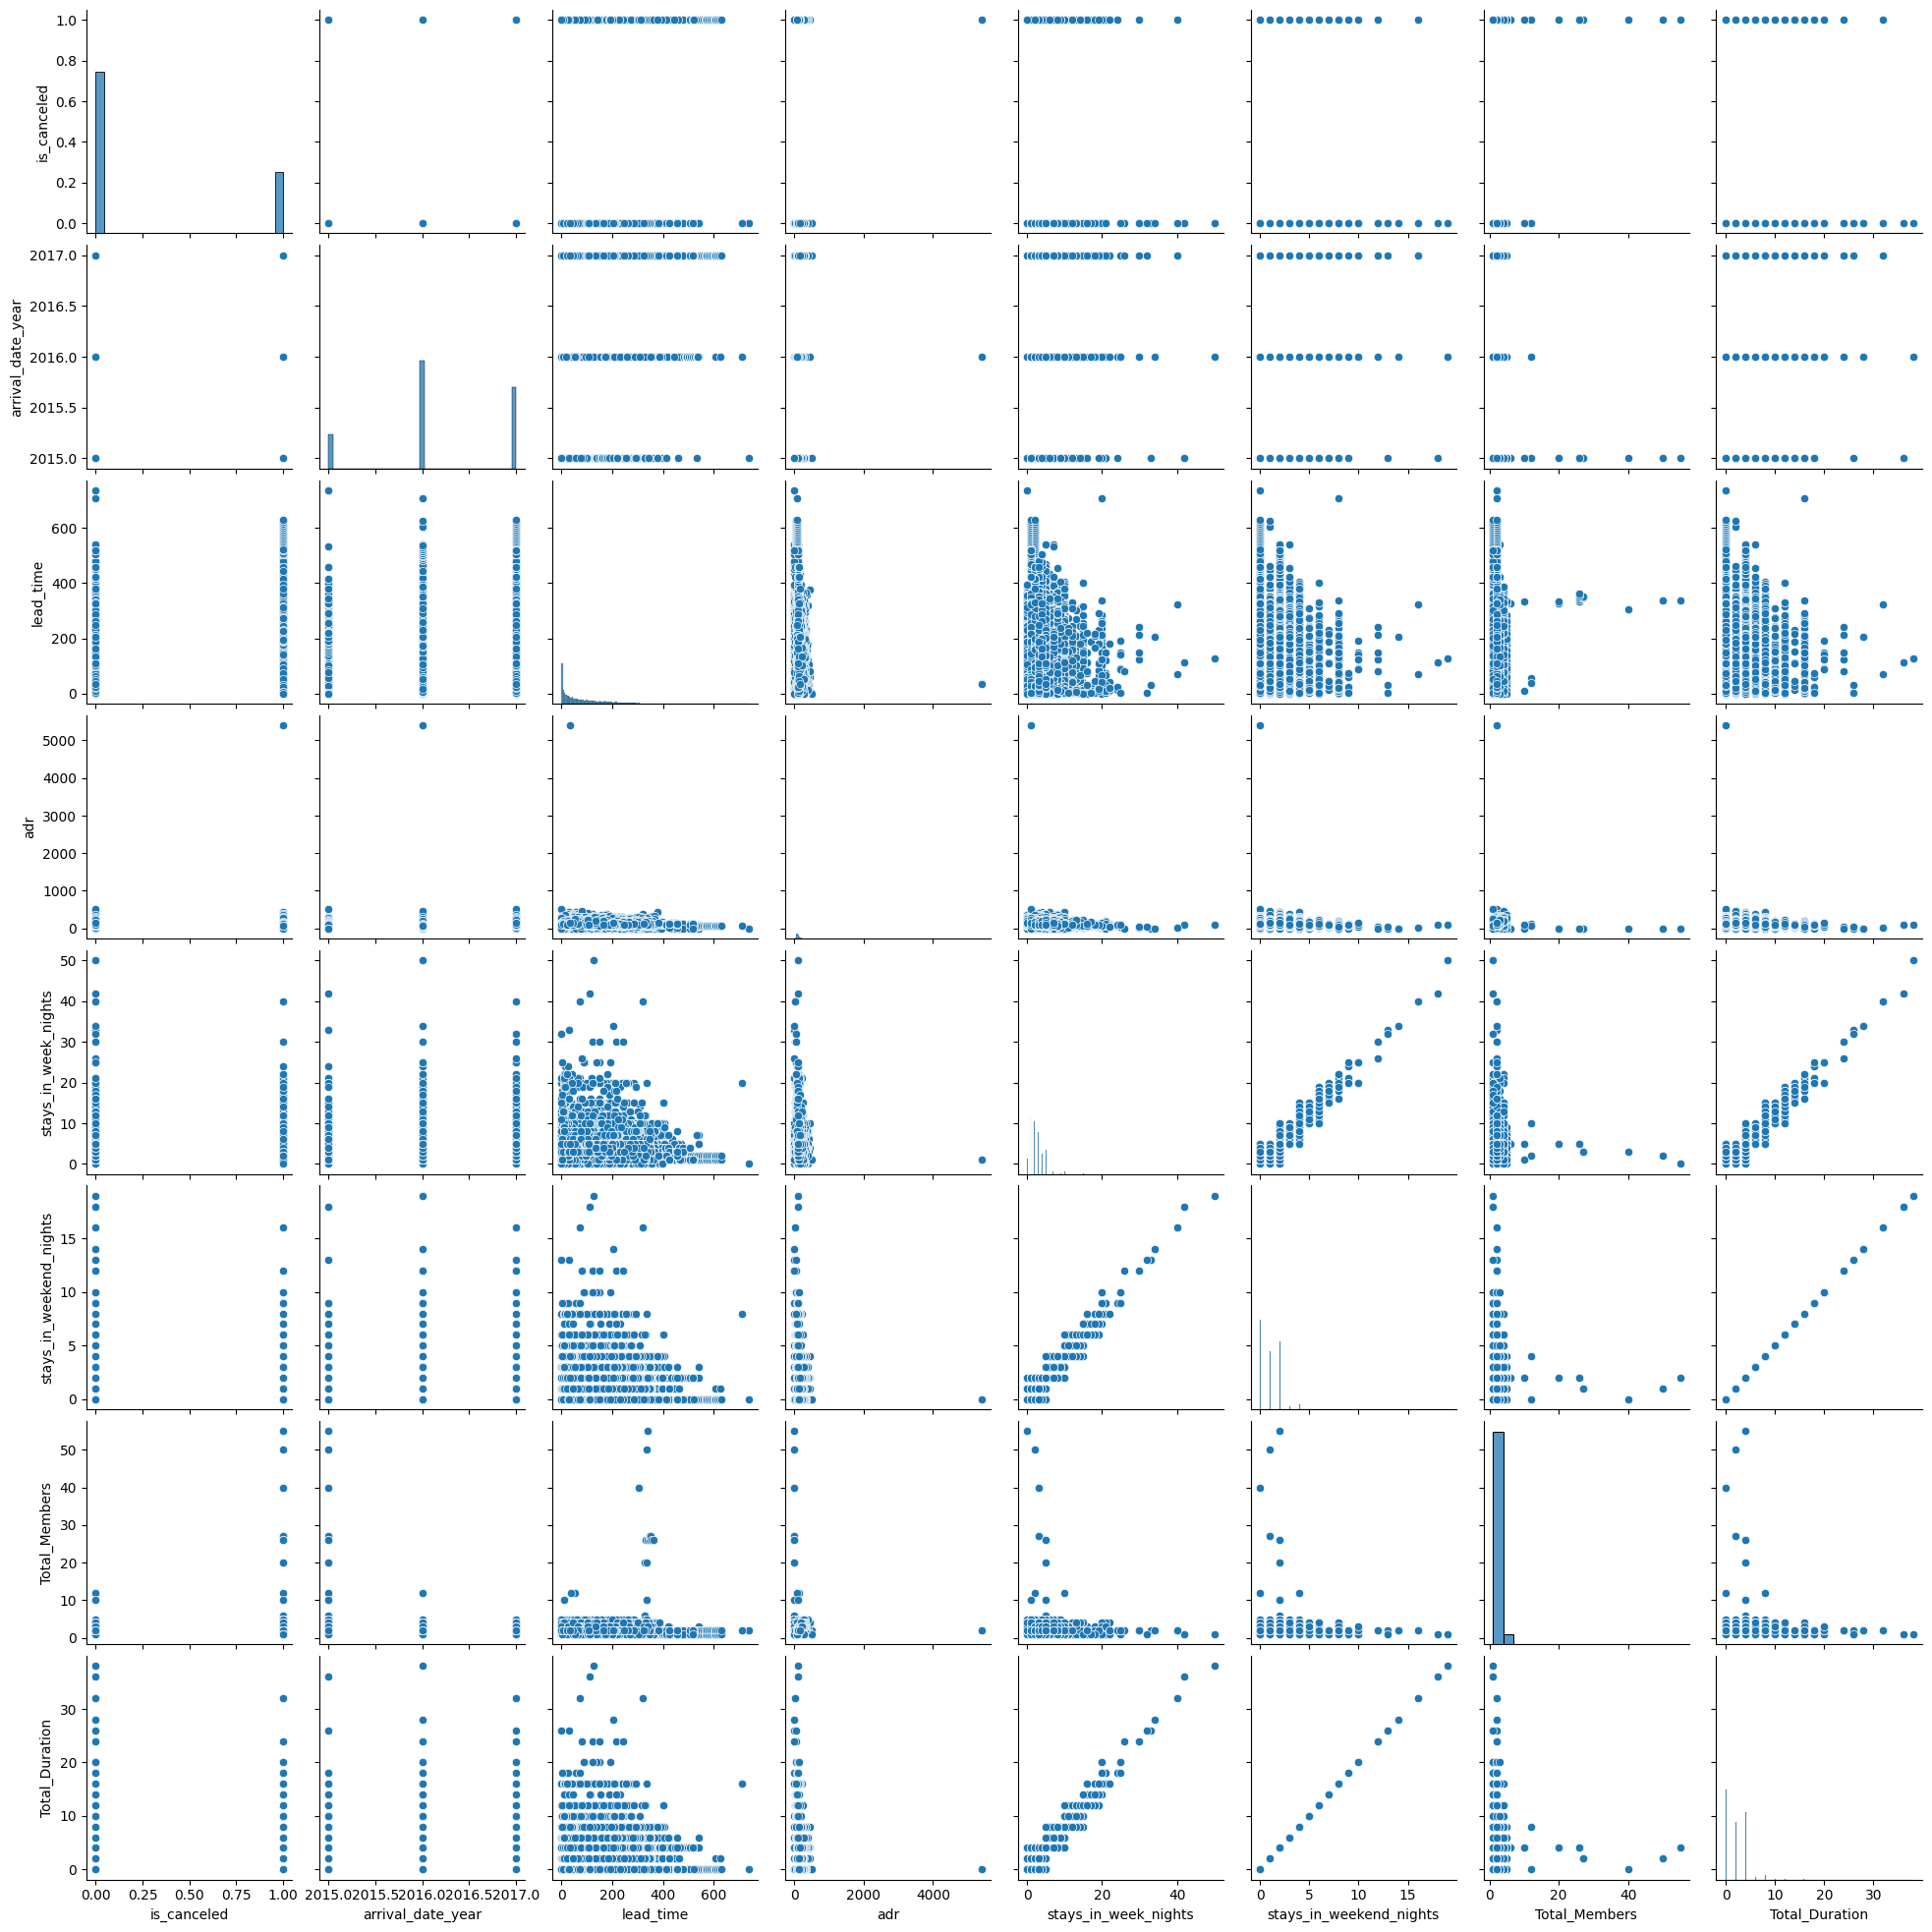

In [119]:
#choosing some of the numerical columns
column_of_interest=['is_canceled','arrival_date_year','lead_time', 'adr', 'stays_in_week_nights', 'stays_in_weekend_nights','Total_Members','Total_Duration']

#plot the pair plot for some defined columns
sns.pairplot(hotel_df[column_of_interest])

#show the plot
plt.show()


#####1. Why did you pick the specific chart?

we choose pairlot because it help us to see the *relationship between multiple numerical variables**.Pairplot **shows scatter plots for every pair of numerical variables**, helping you see how pairs of variables relate to each other.

##### 2. What is/are the insight(s) found from the chart?



*   From the pair plot, we found that if cancellation increases,then total stay duration also decreases.
* As the total number of member increases the adr also increases.



#**5) Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Some of the suggestion to acheive business objective are:

*   City hotel are more preferred so stakeholders can **offer discount to resort hotel to boost revenue from resort bookings**.
*   The Cancellation rate is around 27.52% , we need to **reduce it by taking a feedback** from the csutomers.


*   Bed and Breakfast(BB) is the most preferred meal category, so stakeholders need to **maintain sufficient inventory** for such meal type.
*   There is vast difference between the preference of room type and available choices.**Room type A** is most preffered compared to others. So stakeholder can **run discount offers on other category room** .


* The Guest **repetaion frequency is much below** the expectation,so the client can **introduce loyalty programs and promotional coupons that can be redeemed in next booking**.



*   **TA/TO are the most preferred distribution channel** followed by direct one. so, stakeholders can **offer more to direct booking as they do not have to pay commission to third party** to boost booking prefrence from direct mode.
*  **NO deposit** is the most preffered channel for booking.The hotel industry should **use a minimum booking amount to secure the booking and thus preventing last minute cancellations**.







# **Conclusion**

Thus , to acheive the business objective , the client should be encourged to make the price dyanmic,introduce offers and packages to attract new customer.To retain exsiting customer , the client should give promotinal coupons during check out which can be redeemed in next booking.Extra facilities should be given to customers such as laundary services in resort, wifi connectivity , pick and drop services and specially the parking facilities which could potentially enhance the adr.